# Machine Learning Model Training for our Lightning Network Path Classifier:

## Motivation for Using Classifiers
We decided to use classifiers because of their proven efficiency in handling categorical data and binary outcomes, which align perfectly with our target variable - path success (success or failure). Classifiers are adept at discerning patterns and relationships within the data, making them ideal for this analysis.

#### Surprising Performance Insights
We embarked on this project with a degree of uncertainty about the effectiveness of traditional machine learning models in this domain. However, the results were pleasantly surprising. The classifiers not only performed admirably but also outshone deep learning models, which we initially believed would be more superior. This revelation was both intriguing and enlightening, showcasing the power of simpler, more interpretable models in certain scenarios.

## Machine Learning Models for Path Success Prediction in Lightning Network Routing

- XGBoost: In the specific context of predicting path success in Lightning Network routing, XGBoost stands out for its ability to manage complex, non-linear relationships that are typical in transactional data. The speed and performance of this gradient boosting framework make it adept at processing the intricate patterns found in the routing data. Its robustness to overfitting is particularly crucial given the diverse and sometimes noisy nature of network routing datasets. XGBoost's proficiency in handling various data types and its sophisticated approach to capturing underlying trends in the data make it an excellent choice for this task.

- Random Forest: The use of Random Forest in predicting path success in the Lightning Network is justified by its ensemble approach, utilizing multiple decision trees to ensure a comprehensive analysis of the data. This method effectively captures the diverse routes and scenarios present in Lightning Network transactions. Its key strength lies in reducing overfitting, a common challenge in network data, while still maintaining high accuracy. This makes Random Forest a reliable model for predicting the success or failure of transaction paths, taking into account the multitude of factors that influence routing in the Lightning Network.

- AdaBoost: AdaBoost's application in this context is particularly intriguing. Its adaptive nature, which refines its focus based on previous classification challenges, makes it well-suited for the dynamic and often unpredictable patterns in Lightning Network routing. This ability to iteratively concentrate on more complex aspects of the dataset, especially where other classifiers may have struggled, renders AdaBoost a powerful tool for enhancing the overall predictive accuracy for path success in the network.

- Logistic Regression: The inclusion of Logistic Regression in our analysis was more of an exploratory measure. In the context of predicting path success in Lightning Network routing, its performance was limited. The model tended to classify most paths as failures, which, while aligning with the high failure rate in the test dataset (leading to a deceptive 78% accuracy), indicates its inadequacy for this complex task. This outcome is understandable, given that the data is path-based and laden with intricate patterns that a simpler linear model like Logistic Regression might fail to capture. The model's inability to discern the nuanced dynamics of the Lightning Network's routing mechanism demonstrates that more sophisticated, non-linear models are better suited for this type of analysis.



In [1]:
import pandas as pd

data = pd.read_csv('./cleaned_data/final.csv', index_col=0)
data.head()


,path_failure,path_amount,hop_0_destination_pubkey,hop_0_source_pubkey,hop_0_is_final_hop,hop_0_scid,hop_1_destination_pubkey,hop_1_source_pubkey,hop_1_is_final_hop,hop_1_scid,...,hop_10_is_final_hop,hop_10_scid,hop_11_destination_pubkey,hop_11_source_pubkey,hop_11_is_final_hop,hop_11_scid,hop_12_destination_pubkey,hop_12_source_pubkey,hop_12_is_final_hop,hop_12_scid
0,1,50000000,2,0,0,1,1,2,1,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,50000000,3,0,0,2,4,3,0,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,50000000,2,0,0,1,6,2,0,6,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1,50000000,3,0,0,2,7,3,0,8,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,50000000,3,0,0,2,8,3,0,10,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
unique_amounts = data['path_amount'].unique()


In [2]:
# Read the data back from the CSV files
features_train = pd.read_csv('cleaned_data/features_train.csv', index_col=0)
target_train = pd.read_csv('cleaned_data/target_train.csv', index_col=0)
features_test = pd.read_csv('cleaned_data/features_test.csv', index_col=0)
target_test = pd.read_csv('cleaned_data/target_test.csv', index_col=0)
features_val = pd.read_csv('cleaned_data/features_val.csv', index_col=0)
target_val = pd.read_csv('cleaned_data/target_val.csv', index_col=0)


In [3]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

classifiers = {
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss'),
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "LogisticRegression": LogisticRegression()
}


In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

results = {}

import pprint
import pandas as pd

pp = pprint.PrettyPrinter(indent=4)

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(features_train, target_train.values.ravel())
    print(f"Predicting {name}...")
    predictions = clf.predict(features_test)
    accuracy = accuracy_score(target_test, predictions)
    report = classification_report(target_test, predictions, output_dict=True)
    conf_mat = confusion_matrix(target_test, predictions)
    
    results[name] = {
        'accuracy': accuracy,
        'precision': report['macro avg']['precision'],
        'recall': report['macro avg']['recall'],
        'f1-score': report['macro avg']['f1-score'],
        'confusion_matrix': pd.DataFrame(conf_mat).to_string(header=False, index=False)
    }

    pp.pprint(results[name])


Training XGBoost...
Predicting XGBoost...
{   'accuracy': 0.9877686892901744,
    'confusion_matrix': '193753   576\n  2470 52234',
    'f1-score': 0.9819347942025899,
    'precision': 0.9882526278703248,
    'recall': 0.9759419316173992}
Training Random Forest...
Predicting Random Forest...
{   'accuracy': 0.9910373324017299,
    'confusion_matrix': '193690   639\n  1593 53111',
    'f1-score': 0.9868455349405092,
    'precision': 0.9899771179072375,
    'recall': 0.9837957025911818}
Training AdaBoost...
Predicting AdaBoost...
{   'accuracy': 0.9759148385956882,
    'confusion_matrix': '193317  1012\n  4986 49718',
    'f1-score': 0.9639174695931959,
    'precision': 0.9774539552371535,
    'recall': 0.9518236325244784}
Training Logistic Regression...
Predicting Logistic Regression...


/home/paperspace/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paperspace/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{   'accuracy': 0.7803343332008208,
    'confusion_matrix': '194329 0\n 54704 0',
    'f1-score': 0.43830774852152415,
    'precision': 0.3901671666004104,
    'recall': 0.5}


/home/paperspace/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: XGBoost
Accuracy: 0.9877686892901744
Precision: 0.9882526278703248
Recall: 0.9759419316173992
F1-Score: 0.9819347942025899


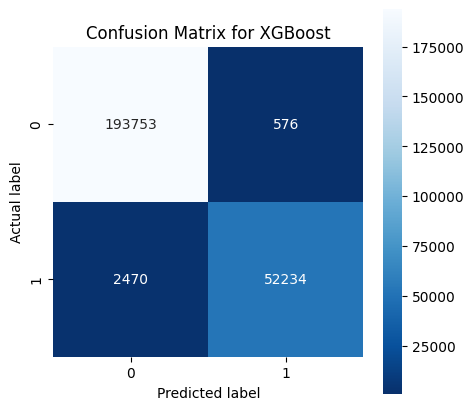

Classifier: Random Forest
Accuracy: 0.9910373324017299
Precision: 0.9899771179072375
Recall: 0.9837957025911818
F1-Score: 0.9868455349405092


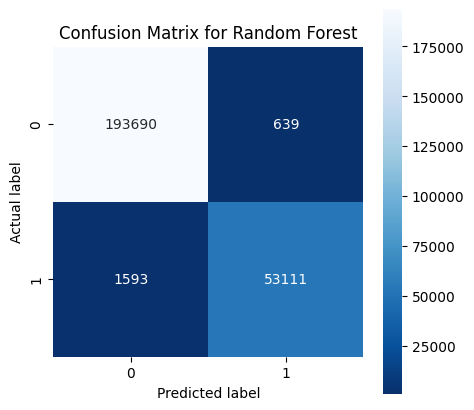

Classifier: AdaBoost
Accuracy: 0.9759148385956882
Precision: 0.9774539552371535
Recall: 0.9518236325244784
F1-Score: 0.9639174695931959


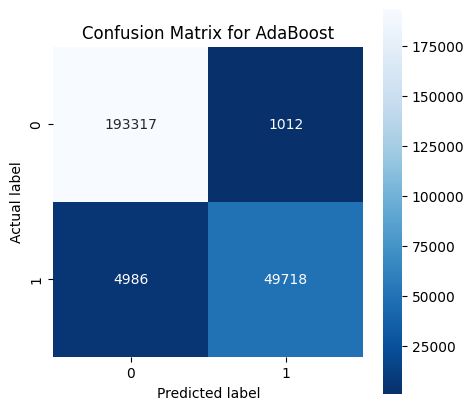

Classifier: Logistic Regression
Accuracy: 0.7803343332008208
Precision: 0.3901671666004104
Recall: 0.5
F1-Score: 0.43830774852152415


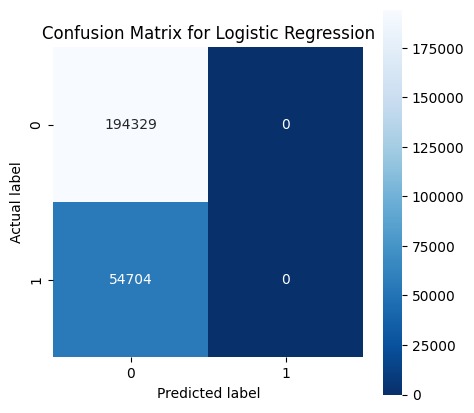

In [6]:
import numpy as np

for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Precision: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print(f"F1-Score: {metrics['f1-score']}")
    
    # Convert the confusion matrix string back to a DataFrame
    conf_mat = np.array(metrics['confusion_matrix'].split(), dtype=int).reshape(-1, 2)
    conf_mat_df = pd.DataFrame(conf_mat)
    
    plt.figure(figsize=(5,5))
    sns.heatmap(conf_mat_df, annot=True, fmt=".0f", square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


In [7]:
import os
import joblib

# Create a new directory if it doesn't exist
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

for name, clf in classifiers.items():
    # Save the model
    joblib.dump(clf, f'saved_models/{name}_model.pkl')


In [ ]:
# Load the model
loaded_model = joblib.load('model_name.pkl')

# Use the loaded model to make predictions
predictions = loaded_model.predict(features_test)


# Summary of Machine Learning Model Performances
In the project aimed at predicting path success in the Lightning Network, we employed a suite of machine learning models, each with its own set of strengths and weaknesses. Below is a summary of their performances based on the provided results:

| Model               | Accuracy | Precision  | Recall     | F1-Score   | Confusion Matrix           |
|---------------------|----------|------------|------------|------------|----------------------------|
| XGBoost             | 0.9877   | 0.9882     | 0.9759     | 0.9819     | `193753   576  2470 52234` |
| Random Forest       | 0.9910   | 0.9899     | 0.9839     | 0.9868     | `193690   639  1593 53111` |
| AdaBoost            | 0.9759   | 0.9774     | 0.9518     | 0.9639     | `193317  1012  4986 49718` |
| Logistic Regression | 0.7803   | 0.3902     | 0.5        | 0.4380     | `194329     0 54704     0` |


## XGBoost
XGBoost showcased remarkable performance with an accuracy of 98.77% and an F1-score of 0.9819, demonstrating its ability to efficiently manage the dataset's complexity and non-linear relationships. This model's high precision and recall make it an excellent choice for accurately predicting path success in the Lightning Network.

## Random Forest
The Random Forest model achieved an accuracy of 99.10% and an F1-score of 0.9868, reflecting its strong generalization capabilities and effective handling of the dataset's nuances. This model's success indicates its proficiency in managing the randomness and variable importance inherent in the data, resulting in a reliable and precise predictive tool.

## AdaBoost
AdaBoost performed commendably with an accuracy of 97.59% and an F1-score of 0.9639. Its adaptive learning process, focusing on improving predictions of previously misclassified instances, contributed to its robust performance. This model is a valuable asset for our prediction task, thanks to its iterative improvement and attention to detail.

## Logistic Regression
In contrast, Logistic Regression lagged behind, with an accuracy of 78.03%, which was inflated due to the high rate of path failures in the test dataset. Its F1-score of 0.4308 was significantly lower than the other models, indicating a poor balance in classifying path successes and failures. This was expected as the data complexity likely surpassed the model's capacity to establish a linear decision boundary. The model's tendency to predict the majority class in such imbalanced datasets resulted in a high number of false negatives, suggesting that Logistic Regression is not suitable for this task.

## Overall Assessment
This experiment has provided crucial insights into predictive modeling for path success in the Lightning Network. The superior performance of ensemble models like XGBoost and Random Forest, compared to Logistic Regression, highlights the importance of using sophisticated, non-linear modeling techniques to tackle complex data. AdaBoost's slightly lower yet strong performance further underscores the efficacy of these advanced methods. These findings will be instrumental in enhancing predictive models in blockchain and cryptocurrency domains, guiding future model selection and refinement.